In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Load the CSV file into a DataFrame
prices = pd.read_csv('prices_insample.csv', parse_dates=True)
macro = pd.read_csv('macro_data_insample.csv',parse_dates=True, index_col=0)

In [13]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
#print(prices.head())
print(macro.head())

First few rows of the DataFrame:
                           gdp               gdp.1               gdp.2  \
NaT                      titan                  io            callisto   
1995-01-01               100.0  100.00000000000001               100.0   
1995-01-02  100.00669302048657  100.00445018420773  100.00636916656102   
1995-01-03  100.01339656367692  100.00865345454493  100.01275102333148   
1995-01-04  100.02006513940715  100.01294164476579  100.01906343595995   

                         gdp.3               gdp.4                 cpi  \
NaT                     europa            ganymede               titan   
1995-01-01               100.0               100.0               100.0   
1995-01-02  100.01142073588159  100.00636681987439  100.00013467795591   
1995-01-03  100.02293060306909  100.01274799623758  100.01704898058946   
1995-01-04   100.0345177596229  100.01903942204726  100.01570301852536   

                         cpi.1              cpi.2               cpi.3  \
NaT 

In [14]:
# Get a summary of the DataFrame
print("\nSummary of the DataFrame:")
#print(prices.describe())
print(macro.describe())


Summary of the DataFrame:
          gdp gdp.1     gdp.2   gdp.3     gdp.4    cpi cpi.1     cpi.2  \
count    7671  7671      7671    7671      7671   7671  7671      7671   
unique   7671  7671      7671    7671      7671   7671  7671      7671   
top     titan    io  callisto  europa  ganymede  titan    io  callisto   
freq        1     1         1       1         1      1     1         1   

         cpi.3     cpi.4  
count     7671      7671  
unique    7671      7671  
top     europa  ganymede  
freq         1         1  


In [15]:
# Check for missing values
print("\nMissing values per column:")
print(prices.isna().sum())


Missing values per column:
Unnamed: 0                   1
ganymede_bonds               1
ganymede_bonds.1             1
ganymede_bonds.2             1
ganymede_bonds.3             1
                            ..
beryllium.3                  1
beryllium_monofilaments      1
beryllium_monofilaments.1    1
beryllium_monofilaments.2    1
beryllium_monofilaments.3    1
Length: 109, dtype: int64


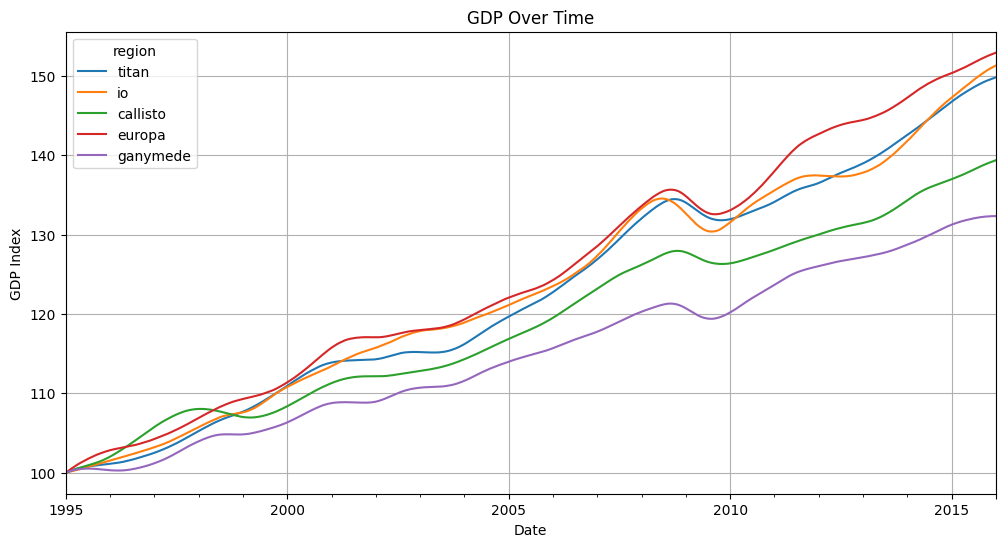

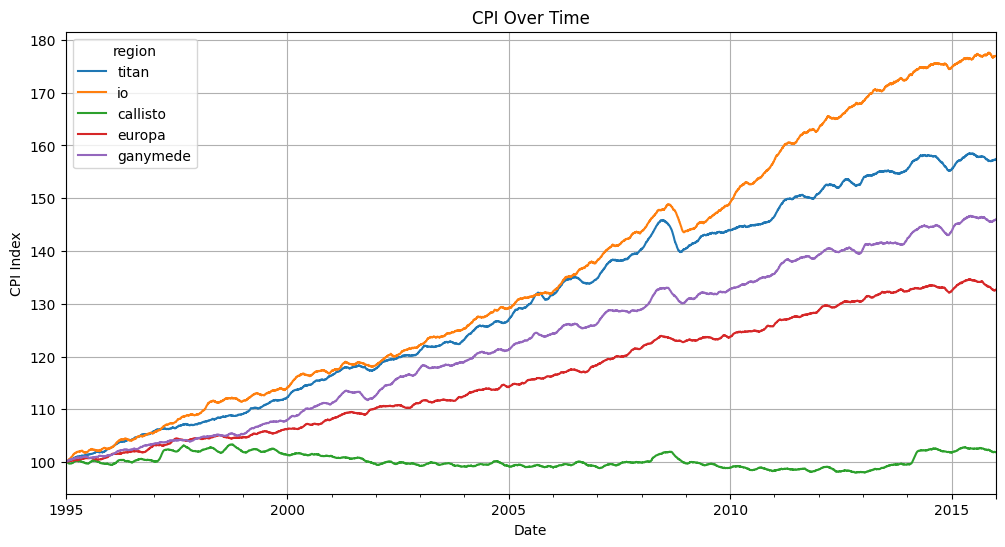

In [25]:
#print(macro.dtypes)

'''macro.plot(figsize=(12, 6), title="Macro Indicators Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()
'''

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV with multi-level header
df = pd.read_csv('macro_data_insample.csv', header=[0, 1], index_col=0, parse_dates=True)

# Optional: rename column levels for clarity
df.columns.names = ['indicator', 'region']

# Plot all GDP lines
df['gdp'].plot(figsize=(12, 6), title='GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Index')
plt.grid(True)
plt.show()

# Plot all CPI lines
df['cpi'].plot(figsize=(12, 6), title='CPI Over Time')
plt.xlabel('Date')
plt.ylabel('CPI Index')
plt.grid(True)
plt.show()


In [ ]:
#plot all price data

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace with your actual filename if needed)
df = pd.read_csv('prices_insample.csv', parse_dates=['AsOfDate'], index_col='AsOfDate')

# Preview the data
print(df.head())

# Plot all futures prices over time
plt.figure(figsize=(15, 8))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Futures Price Development Over Time')
plt.xlabel('Date')
plt.ylabel('Price Level')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # move legend outside plot
plt.grid(True)
plt.tight_layout()
plt.show()


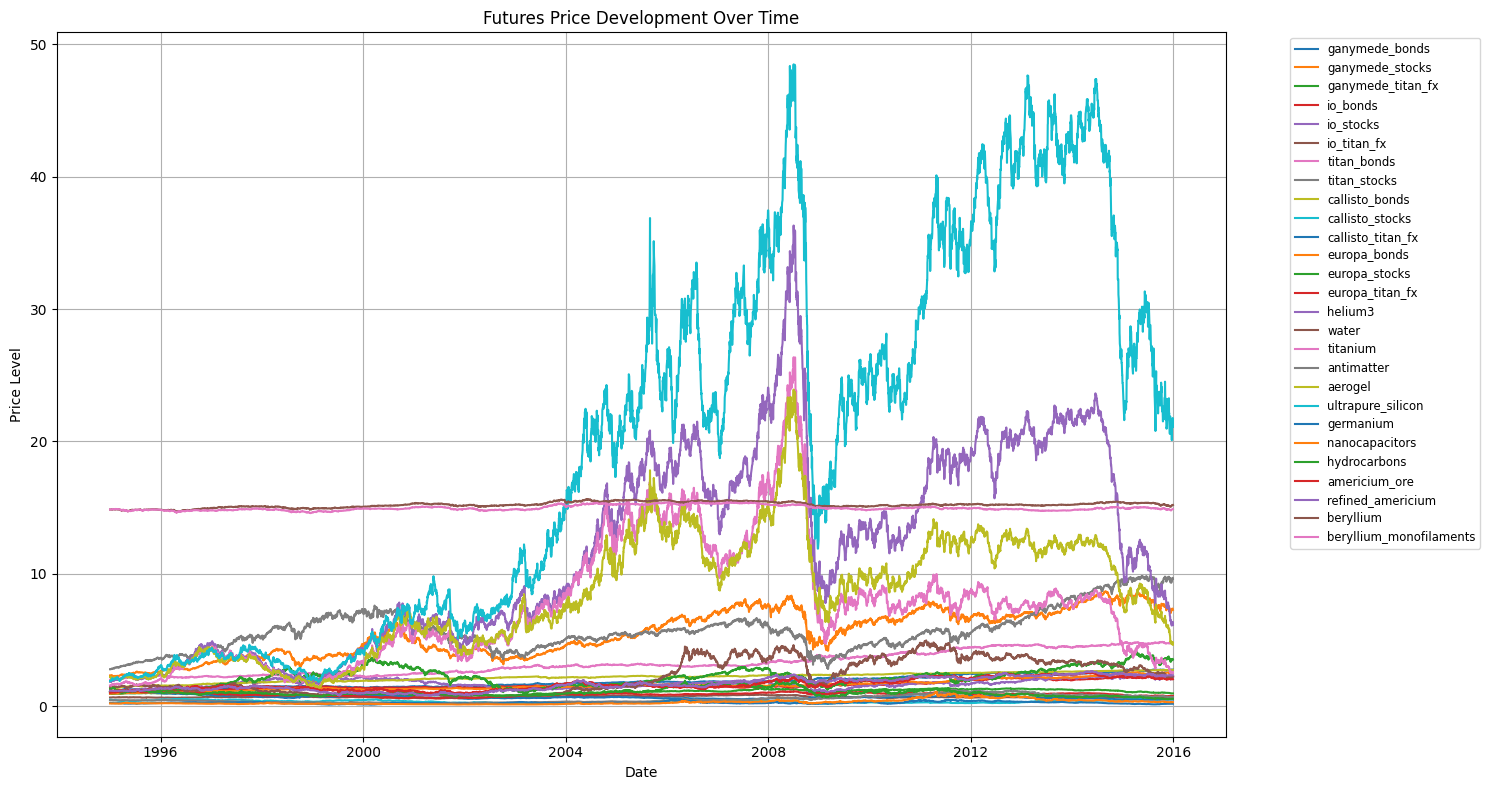

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("close_prices_insample.csv", index_col='AsOfDate', parse_dates=True)

# Optional: make sure all values are numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Drop any columns that are completely empty
df = df.dropna(axis=1, how="all")

# Plot all futures prices over time
plt.figure(figsize=(15, 8))

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title("Futures Price Development Over Time")
plt.xlabel("Date")
plt.ylabel("Price Level")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()



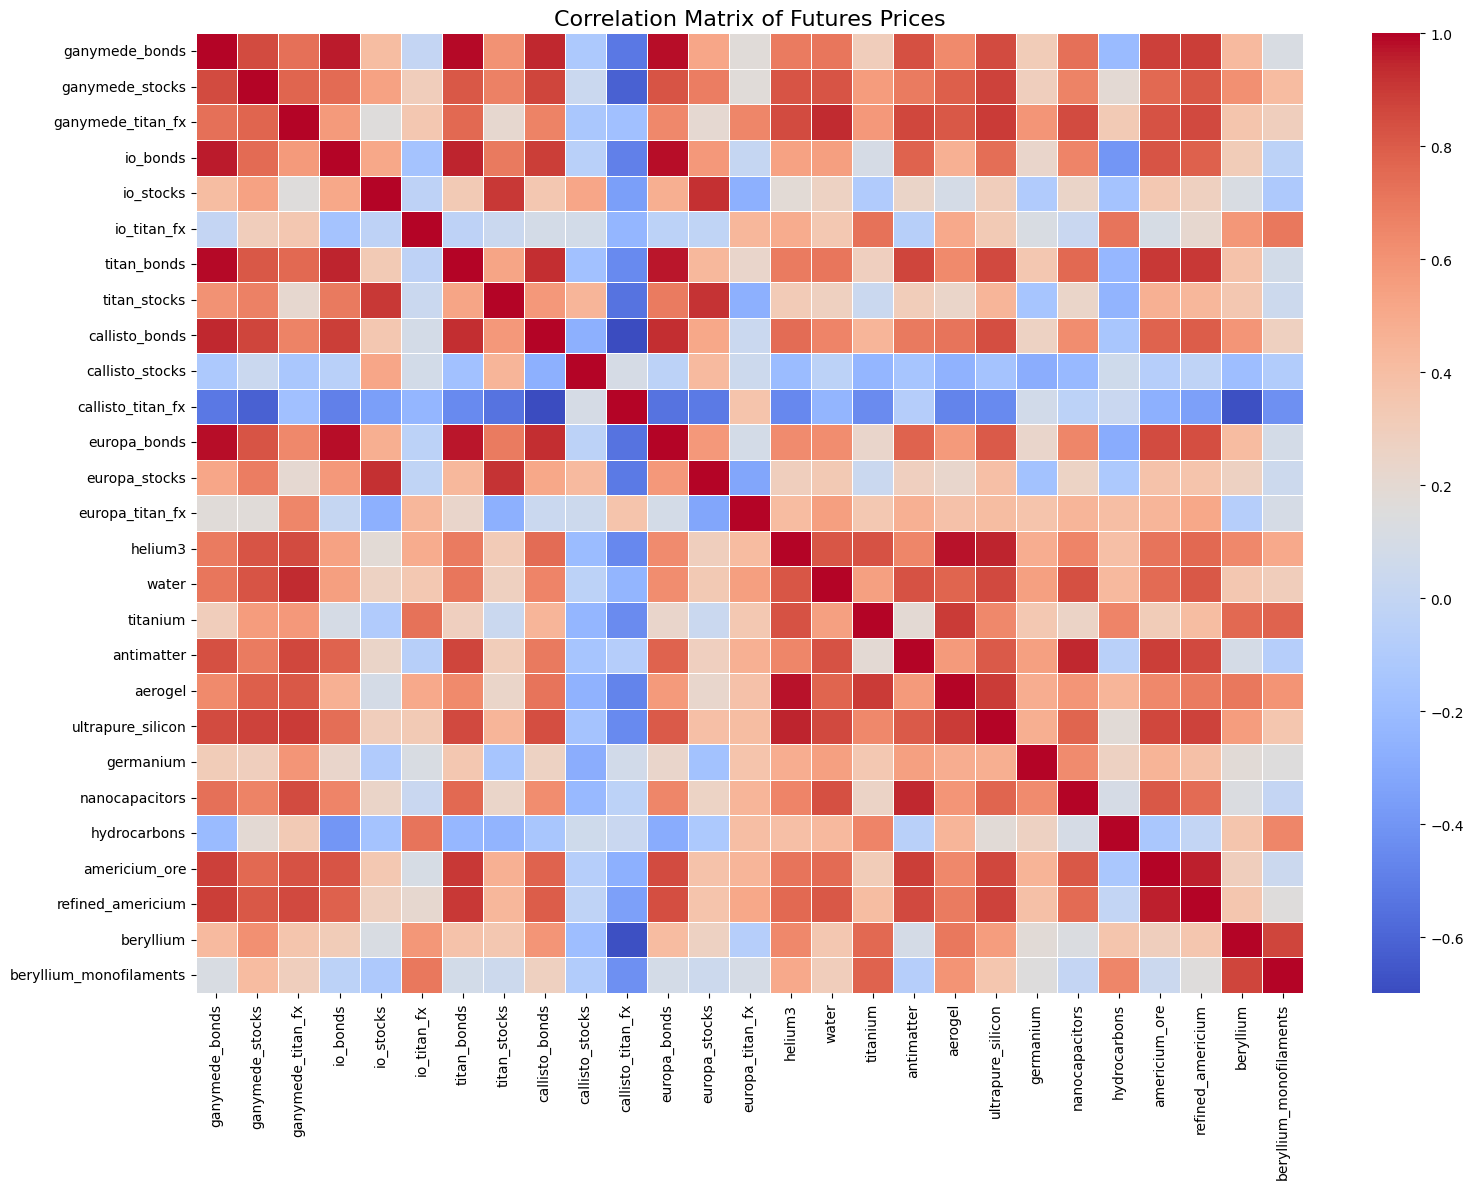

In [38]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))
plt.title("Correlation Matrix of Futures Prices", fontsize=16)

# Plot the heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import numpy as np

# Compute correlation matrix (if not already done)
corr_matrix = df.corr()

# Remove self-correlations by setting diagonal to NaN
np.fill_diagonal(corr_matrix.values, np.nan)

# Unstack to get pairwise combinations
corr_pairs = corr_matrix.unstack().dropna()

# Drop duplicate pairs (A-B and B-A)
corr_pairs = corr_pairs[~corr_pairs.index.duplicated(keep='first')]

# Sort by absolute correlation strength (descending)
strongest_pairs = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index)

# Show top N most correlated asset pairs
top_n = 3
print("\n🔗 Top Correlated Asset Pairs:\n")
print(strongest_pairs.head(top_n))



🔗 Top Correlated Asset Pairs:

ganymede_bonds  titan_bonds       0.989977
titan_bonds     ganymede_bonds    0.989977
europa_bonds    ganymede_bonds    0.984738
dtype: float64
